<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/ivan-private-Lab5/Lab5/ivan-private_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Differential equations**
**Ivan Zivkovic**

# **Abstract**

In the following lab, methods for approximating solutions to initial value problems will be implemented. 

# **About the code**

This report is written by Ivan Zivkovic (ivanzi@kth.se)

In [239]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [240]:
# Load neccessary modules.

import numpy as np
import matplotlib.pyplot as plt


from typing import TypeAlias, Callable, Tuple
NumpyVector_t: TypeAlias = np.ndarray
NumpyMatrix_t: TypeAlias = np.ndarray

# **Introduction**

Initial value problems are differential equations which have a variable that represents time. It is usually so that the solution to the differential equation is a function $u(t)$ with an initial condition $u(0)$ over a time period $[0, T]$. 

This lab will first deal with a method for approximating solutions for scalar initial value problems which have a scalar function $u : [0, T] \rightarrow R$ as solution and take the form:
$$\dot{u}(t) = f(u(t), t), \quad 0 < t \leq T$$
$$u(0) = u_0$$
with $f : R \times [0, T] \rightarrow R$. 

The second part of this lab will deal with approximating solutions to systems of initial value problems, which is when the solution function is a vector function $u : [0, T] \rightarrow R^N$. The system of initial value problem takes the form: 
$$\dot{u}(t) = f(u(t), t), \quad 0 < t \leq T$$
$$u(0) = u_0$$
with $f : R^N \times [0, T] \rightarrow R^N$. 


Both parts of this lab will aim to implement some type time stepping algorithm which will approximate $u(t)$ in a discrete number of points in the range $[0, T]$. 

# **Method**

### **Time stepping for scalar initial value problem $\dot{u}(t) = f(u(t),t)$**

To approximate the scalar initial value problem, the explicit Euler method will be implemented (also known as forward Euler method). 
The way that it works is that we first calculate the length of a time step $k_n = t_n - t_{n-1}$. We then use a finite difference to approximate the derivative $\dot{u}$ in a point:

$$\dot{u}(t_{n-1}) \approx \frac{u(t_n) - u(t_{n-1})}{k_n}$$

We can rewrite this to get an approximate update formula:
$$u(t_n) \approx u(t_{n-1}) + k_n \dot{u}(t_{n-1}) = u(t_{n-1}) + k_n f(u(t_{n-1}), t_{n-1})$$

This approximation is called the forward Euler method that can also be written as:
$$U_n = U_{n-1} + k_n f(U_{n-1}, t_{n-1})$$

In the case for this implementation, we will assume that the time range $[0, T]$ will be equally divided into discrete points which means that all $k_n = k$ are constant. Also, the solution $u$ will be a vector with dimension $n \times 1$ where $n$ is the number of time steps used. Thus, the vector $u$ will approximate the real solution in $n$ number of times. 

One drawback to this method is that it usually have a constraint on how big $k$ can be for the method to still be stable. This size must be calculated for the problem you are trying to solve before using this method. 

In [241]:
def explicit_euler_method(f: Callable[[float, float], float], u0: float, T: float, k: float) -> Tuple[NumpyVector_t, NumpyVector_t]:
    t = np.arange(0, T, k)
    
    u = np.empty(t.shape)
    
    u[0] = u0
    
    for i in range(1, len(t)):
        u[i] = u[i-1] + k * f(u[i-1], t[i-1])

    return u, t


### **Time stepping for a system of initial value problems $\dot{u}(t) = f(u(t),t)$**

To approximate the system of initial value problems, we will use the same method as before for the scalar initial value problem. When it comes to the explicit Euler method for vector functions, the implementation looks almost the same but with the difference being that the function $u$ we are trying to approximate now is a vector function meaning that in our implementation we need to change the approximation $u$ to be a matrix of dimension $n \times N$ where $n$ is the number of time steps and $N$ is the dimension of the solution vector. This also means that the function $f$ we are using now takes a vector as input along with a time $t$. 


In [242]:
def explicit_euler_method_system(f: Callable[[NumpyVector_t, float], NumpyVector_t], u0: NumpyVector_t, T: float, k: float) -> Tuple[NumpyMatrix_t, NumpyVector_t]:
    t = np.arange(0, T, k)
    
    u = np.empty((len(t), len(u0)))
    
    u[0, :] = u0
    
    for i in range(1, len(t)):
        u[i, :] = u[i-1, :] + k * f(u[i-1, :], t[i-1])

    return u, t

# **Results**

### **Time stepping for scalar initial value problem $\dot{u}(t) = f(u(t),t)$**

To test our implementation we will use the model problem:
$$\dot{u}(t) - \lambda u(t) = 0, \quad 0 < t \leq T$$
$$u(0) = 1$$

Which has the solution:
$$u(t) = \exp(\lambda t)$$

Which can be rewritten on the form
$$\dot{u}(t) = f(u(t), t), \quad u(0) = 1$$
$$f(u(t), t) = \lambda u(t)$$

For this particular test, $\lambda = -0.5$ and a time step size $k=0.05$ will be used to guarantee that the method is stable. For this particular method we have the constraint that $Re(k \lambda) < 0$ for the explicit Euler method to be stable. 

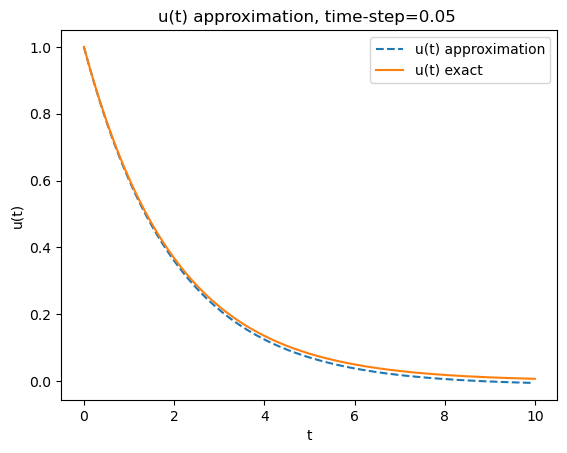

In [243]:
lambda_ = -0.5

u_exact = lambda t: np.exp(lambda_ * t)

f = lambda u, t: lambda_ * u_exact(t)

u0 = 1

T = 10

dt = 0.05

u_approx, t = explicit_euler_method(f, u0, T, dt)

plt.plot(t, u_approx, "--", label=f"u(t) approximation")


# Plot the real u(t)
dt = 10**-3
t2 = np.arange(0, T, dt)
plt.plot(t2, u_exact(t2), label="u(t) exact")


plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("u(t) approximation, time-step=0.05 ")
plt.legend()
plt.show()


As we can see from the graph above, the approximated solution is very close to the real solution but for higher $t$ start to differ. Since the method is stable for the chosen parameters it is most likely due to accumulated round of errors when dealing with floating point arithmetic. 

### **Time stepping for a system of initial value problems $\dot{u}(t) = f(u(t),t)$**

To test our implementation we will use the system of initial value problem from problem 14.1 from the book:
$$\dot{u}_1(t) = u_2(t)$$
$$\dot{u}_2(t) = -u_1(t)$$
with $0 < t \leq T$, $u_1(0) = 0$ and $u_2(0) = 1$ with solution $u(t) = (u_1(t), u_2(t))$

This system of initial value problems has the solution:
$$u(t) = (sin(t), cos(t))$$


We need to rewrite the problem in the form $\dot{u}(t) = f(u(t), t)$ so that we can use the implemented method, which can be done as follows:
$$\dot{u}(t) = f(u(t), t), \quad u(0) = (0, 1)$$
$$f(u(t), t) = (u_2(t), -u_1(t))$$


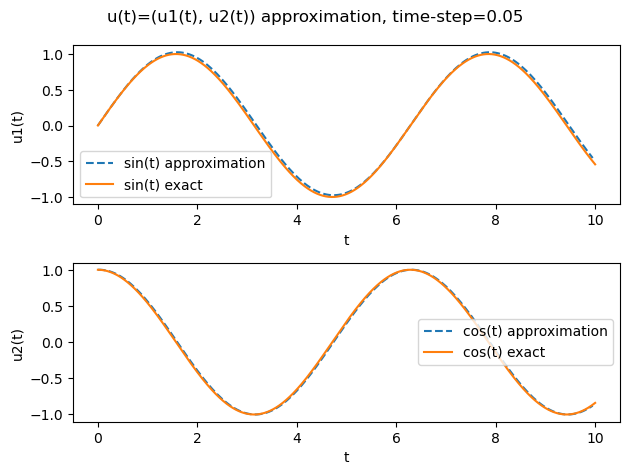

In [244]:
# The solution to the differential equation from problem 14.1 in the book 
def u_exact(t: float):
    return np.array( [np.sin(t), np.cos(t)] )


# The differential equation from problem 14.1 in the book 
def f(u: np.ndarray, t: float):
    u1, u2 = u_exact(t)
    return np.array( [u2, -u1] )


u0 = np.array( [0, 1] )

T = 10

dt = 0.05

u_approx, t = explicit_euler_method_system(f, u0, T, dt)


fig, axis = plt.subplots(2, 1)

# Plot approximated u(t)
axis[0].plot(t, u_approx[:, 0], "--", label=f"sin(t) approximation")

axis[1].plot(t, u_approx[:, 1], "--", label=f"cos(t) approximation")


# Plot the real u(t)
dt = 10**-3
t2 = np.arange(0, T, dt)

u_exact_vec = u_exact(t2).T

axis[0].plot(t2, u_exact_vec[:, 0], label="sin(t) exact")
axis[1].plot(t2, u_exact_vec[:, 1], label="cos(t) exact")


fig.suptitle("u(t)=(u1(t), u2(t)) approximation, time-step=0.05")


axis[0].set_xlabel("t")
axis[1].set_xlabel("t")

axis[0].set_ylabel("u1(t)")
axis[1].set_ylabel("u2(t)")

axis[0].legend()
axis[1].legend()

fig.tight_layout()
plt.show()



As we can see from the graphs above, the implemented method does a good job of approximating the solution $u(t) = (u_1(t), u_2(t))$. 

# **Discussion**

Both the implementations of the explicit Euler method seems to be working well. They do however become unstable if the time-step used becomes to large which is not ideal, but for small time-steps they work well. 